# Infering the phylogenetic relationship between archaic and AMH Y

In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(cowplot)
library(lemon)

suppressPackageStartupMessages({
    library(ggtree)
    library(treeio)
})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/archaic-ychr
Loading required package: ape

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘lemon’

The following object is masked from ‘package:purrr’:

    %||%

Loading ychr


Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

Locations of missing genotypes:

In [2]:
aln_full <- read.dna("../data/fasta/full_merged_nodmg.fa", format = "fasta")

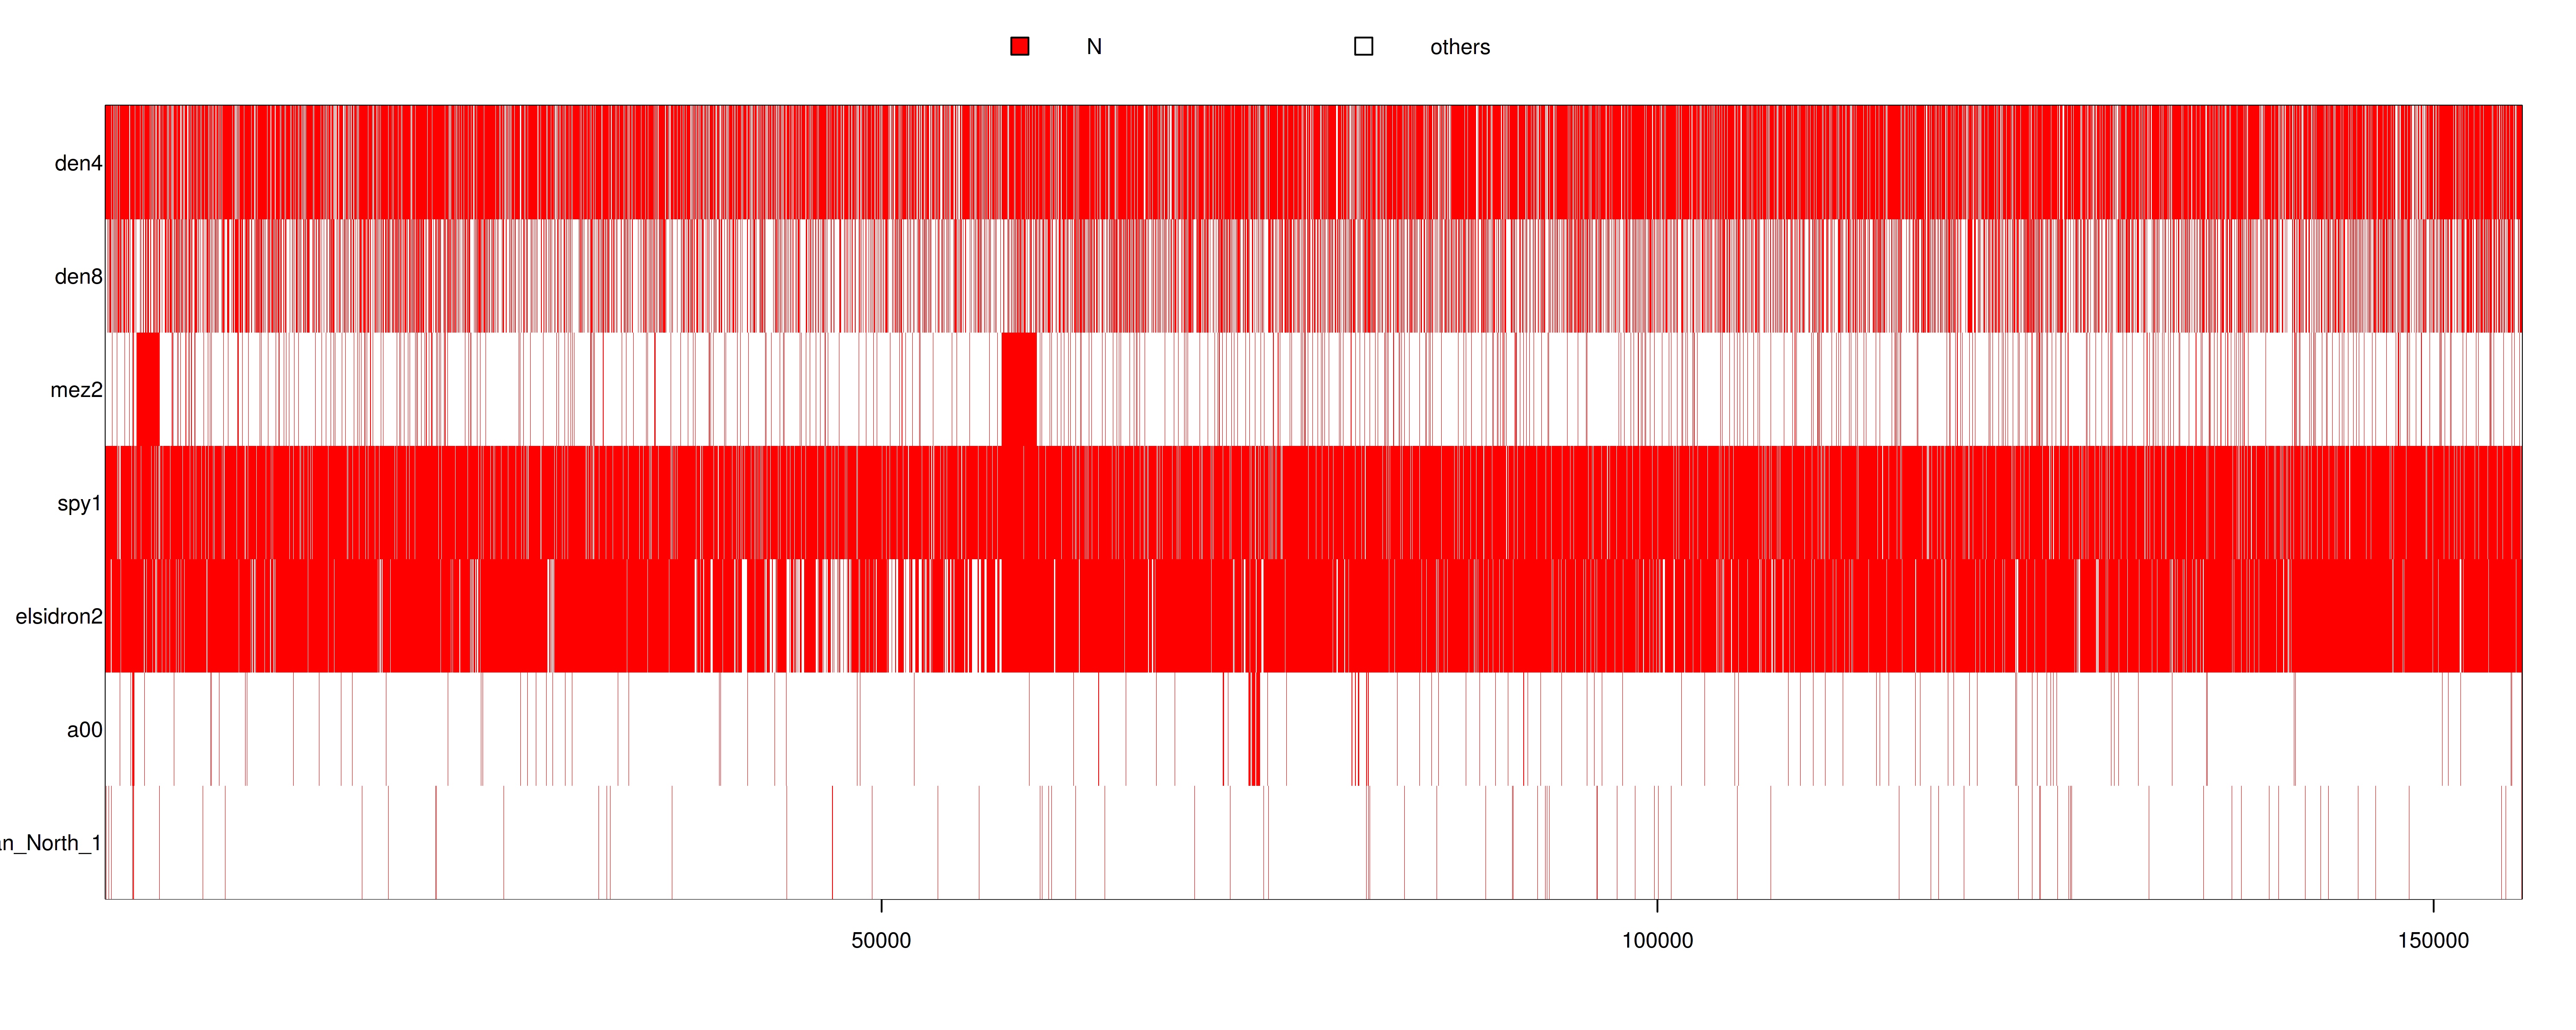

In [3]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "elsidron2", "a00", "S_Ju_hoan_North_1"), ] %>%
    image("N")

Zooming on a Neanderthal-specific deletion?

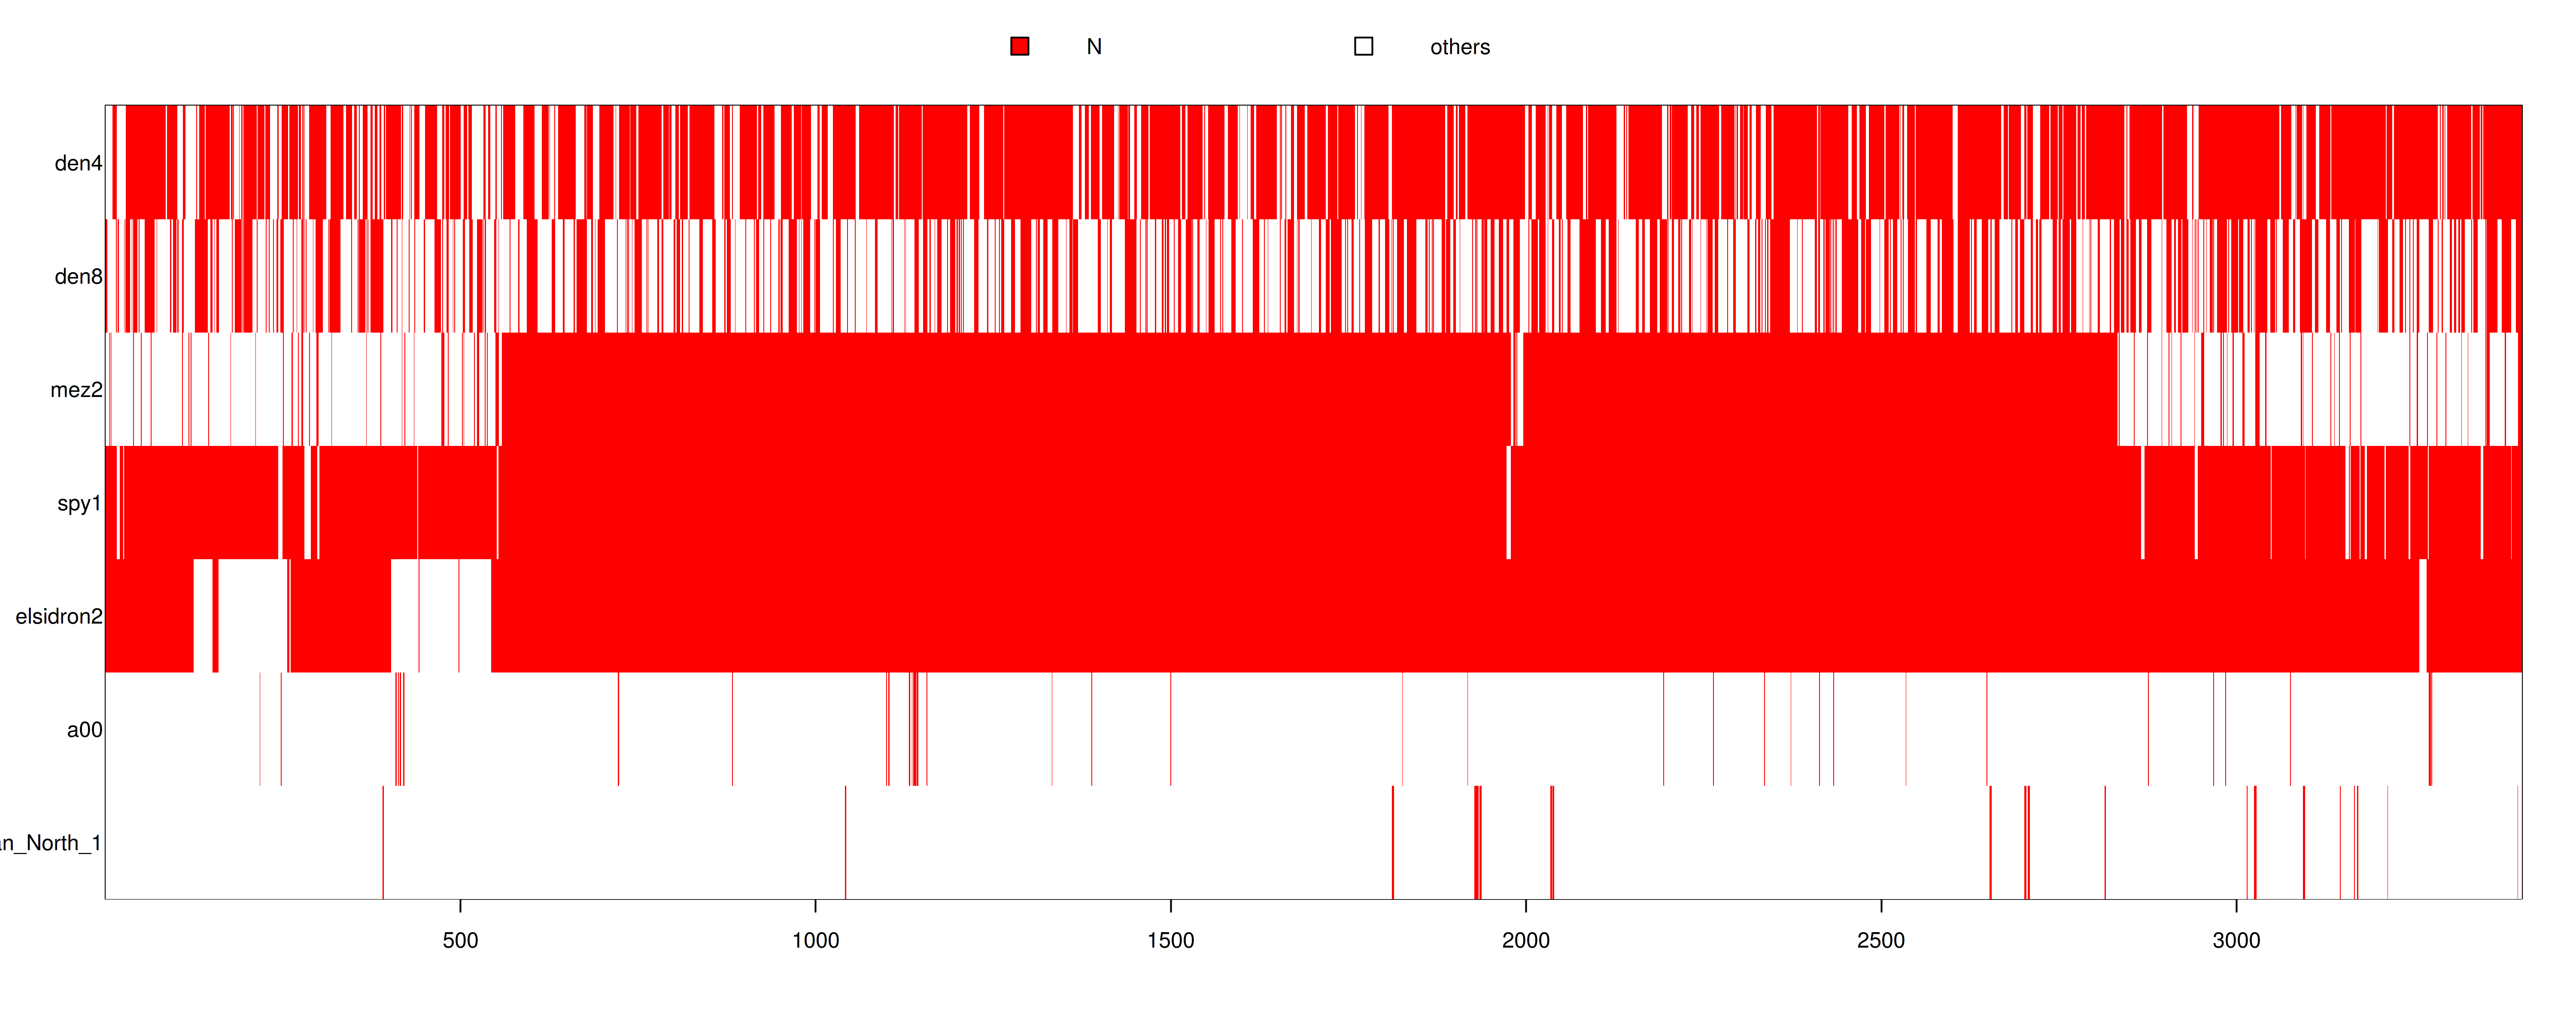

In [4]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "elsidron2", "a00", "S_Ju_hoan_North_1"), 57200:60600] %>%
    image("N")

### Pairwise distances vs Mezmaiskaya 2 using `dist.dna` from ape

Without pairwise deletion:

In [5]:
for (m in c("raw", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = F) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006024096       0.006024096       0.006024096       0.951807229 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.00604842        0.00604842        0.00604842               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006049933       0.006049933       0.006049933               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006051497       0.006051497       0.006051497               NaN 


With pairwise deletion:

In [6]:
for (m in c("raw", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = T) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01311071        0.01316940        0.01621051        0.97067982 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01323391        0.01329372        0.01639943               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322704        0.01328684        0.01638912               NaN 


### Pairwise distances vs Mezmaiskaya 2 using `dist.ml` from phangorn

Only two molecular evolution models are implemented, JC69 and F81:

In [7]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "none") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339239        0.01344851        0.01663432       10.00000000 


In [8]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "pairwise") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339239        0.01344851        0.01663432       10.00000000 


In [9]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "all") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.00604842        0.00604842        0.00604842       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006103251       0.006118860       0.006118860      10.000000000 


It seems that given that it's important to use pairwise deletion (due to the large number of missing sites in archaic Y chromosomes), any reasonable default model is fine here. The "vs-chimp" distances are giving NaN values for some `dist.dna` models and also are always fixed to a hardcoded value 10 by the `dist.ml` function. After looking at the code, this seems to be a default value for overflow situations, which is affecting both methods regardless of the molecular evolution model (except for models which are simply based on the proportion of matching alleles such as the "raw" option in `dist.dna`).

It's also quite interesting that the "raw" proportions of sites give the same values as those obtained by more sophisticated models. I suppose this makes sense given the relatively short evolutionary time scale I'm dealing with here.

**Note**: Yeah, so the man page for `dist.dna` clearly says that

> If the sequences are very different, most evolutionary distances are undefined and a non-finite value (Inf or NaN) is returned. You may do dist.dna(, model = "raw") to check whether some values are higher than 0.75.

The explanation for this magic number comes from the limitations of the substitution models and is quite obvious from looking at the distance equations:

More details [here](https://www.megasoftware.net/mega1_manual/Distance.html):
> The Jukes-Cantor distance can be computed if p < 0.75; otherwise it is not applicable because the argument of the logarithm becomes negative. 

From the [mailing list](https://r-sig-phylo.r-project.narkive.com/NjZMUVzZ/bootstrapping-with-boot-phylo):
> the correct distance for (say) the Jukes-Cantor model or the Kimura 2-parameter model when the sequences differ by more than 75% is (positive) infinity, since these are inferred to be unrelated sequences

> Most models ("K80", "JC69" etc.) are not defined for distances >=0.75 and will return Inf or NaN (the 0.75 can vary a bit, depending on the substitution model)

The reason for the above is obvious - to make the calculations more efficient I saved only variable sites during the VCF -> FASTA conversion. Naturally, though, the molecular models predict distances that are too large to be meaningful. I will stick to the "raw" proportion measure, because it gives pretty much the same distance values as the more sophisticated models anyway.

## Neighbor-joining tree

In [10]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [11]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [12]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [13]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [14]:
tr$edge.length

[1] -8.774873e-04  2.140645e-03  5.005907e-04  8.165468e-04  1.658286e-03
 [6]  4.115384e-03  1.292064e-04  5.767704e-05  3.508268e-04  3.030427e-04
[11]  3.574685e-04  6.867446e-04  2.952774e-04  1.020427e-03  5.004382e-04
[16]  5.495073e-04  6.685207e-04  8.743008e-04  2.177972e-05  1.642086e-04
[21]  1.485402e-04  9.187792e-04  7.093500e-04  9.417897e-04  4.001970e-04
[26]  1.382109e-04  7.843887e-06  1.055357e-03  7.544000e-05  7.346500e-05
[31]  4.937648e-03  6.001150e-03  1.116799e-03  3.510724e-03  3.166096e-03
[36]  6.526771e-03  4.756640e-01  4.864562e-01

In [15]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [16]:
tr <- as.treedata(tr, bp)

In [17]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
mezsidron_node <- getMRCA(as.phylo(tr), tip = c("El Sidrón 1253", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [18]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

In [19]:
save(den_node, neand_node, amh_node, amhneand_node, nonafr_node, root_node, mezsidron_node, tr, df,
     file = here("data/rds/phylogeny.RData"))

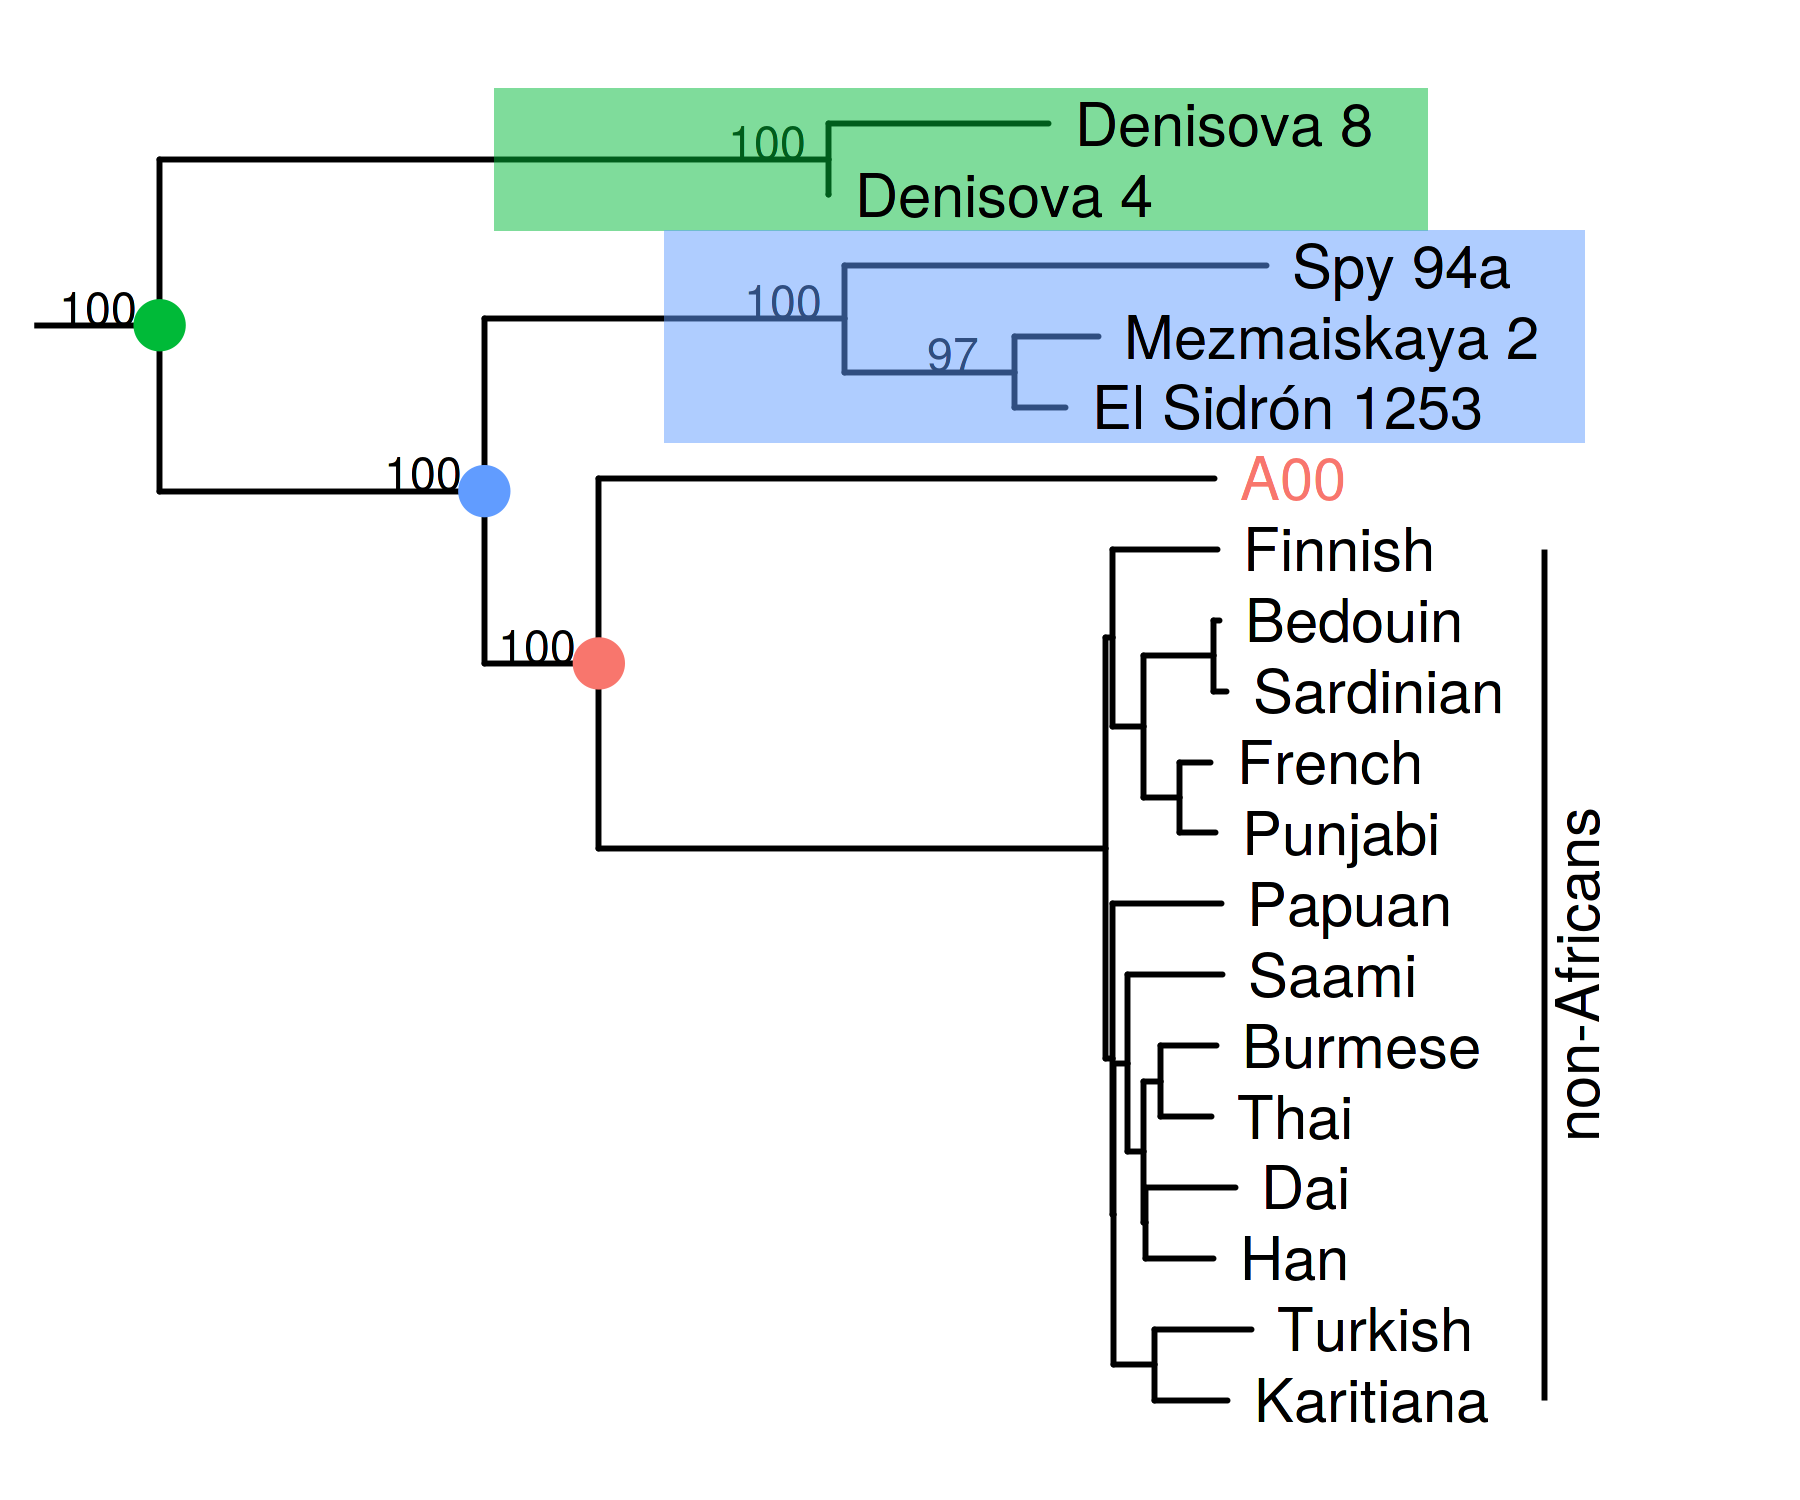

In [20]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node, mezsidron_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_cladelabel(offset.text = 0.0002, node = nonafr_node, angle = 90, hjust = "center",
                    offset = 0.0025, align = T, label = "non-Africans", fontsize = 5) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5, color = colors[c(2, 3, 1)]) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015), bottom = "both", left = "none")

# Tree for the contamination analysis

In [21]:
aln_full <- read.phyDat(here("data/fasta/modern_var_full_merged.fa"), format = "fasta")

aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [22]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [23]:
tr <- buildtree_distdna_midpoint(aln_full)

In [24]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin")

In [25]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [26]:
tr <- drop.tip(tr, tip = "chimp")

In [27]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

In [28]:
ingroup <- c('Bedouin', 'Turkish', 'French', 'Burmese', 'Thai', 'Finnish', 'Sardinian',
             'Han', 'Dai', 'Punjabi', 'Saami', 'Papuan', 'Karitiana')

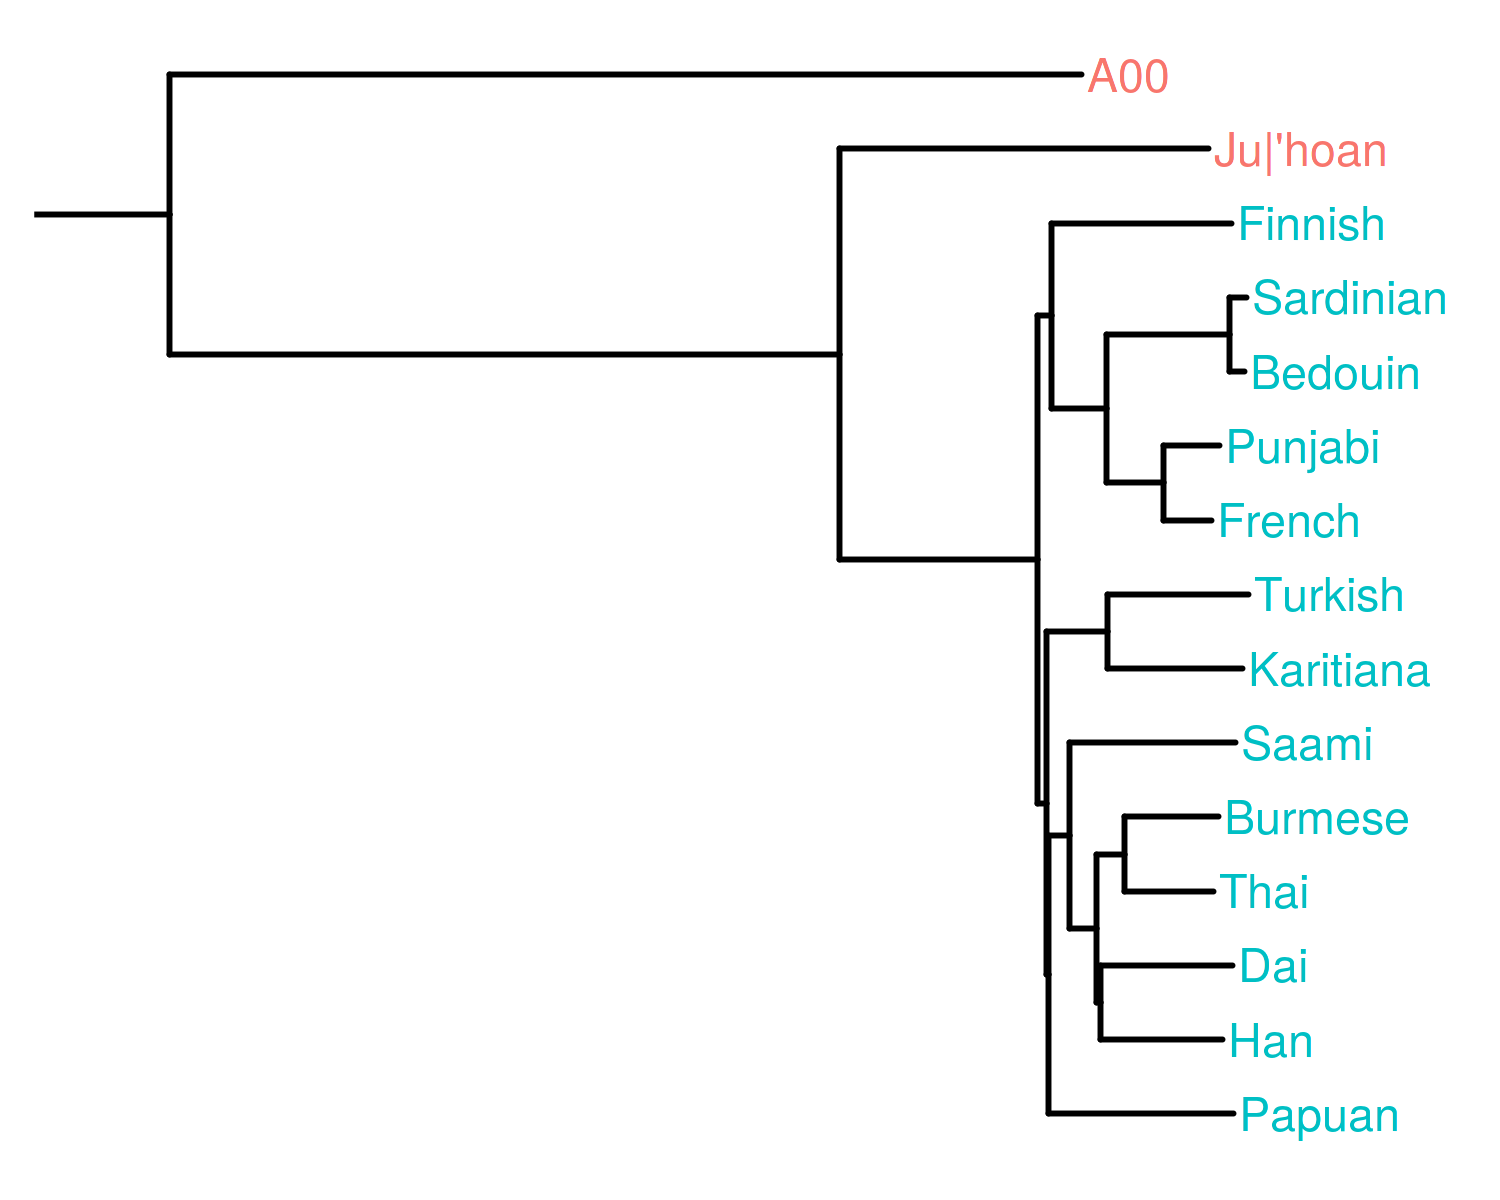

In [29]:
set_dim(5, 4)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_rootedge(rootedge = getMRCA(as.phylo(tr), c("A00", "Bedouin"))) +
    guides(color = F)

p %<+% df +
    geom_tiplab(aes(color = name %in% ingroup)) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.008), bottom = "both", left = "none")

### Distance matrices on all vs variable-sites-only data - investigating the Chimp distance problem above

Distance matrices using complete Y chromosome data:

In [30]:
x <- read.dna(here("data/fasta/modern_all_full_merged.fa"), format = "fasta")

In [31]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(x, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                     S_Dinka_1  S_Punjabi_1      S_Han_2 S_Sardinian_1
S_Punjabi_1       1.022907e-04                                        
S_Han_2           1.020659e-04 7.081666e-05                           
S_Sardinian_1     1.076863e-04 4.721111e-05 7.621221e-05              
S_Thai_1          1.013915e-04 7.014221e-05 4.788555e-05  7.553777e-05
S_Mbuti_1         8.587925e-05 1.072367e-04 1.070118e-04  1.126322e-04
S_Mandenka_1      8.318147e-05 1.045389e-04 1.043141e-04  1.099344e-04
S_French_1        1.020659e-04 2.180703e-05 7.059184e-05  4.698629e-05
S_Turkish_1       1.088104e-04 7.801073e-05 7.418888e-05  8.340629e-05
S_BedouinB_1      1.079111e-04 4.743592e-05 7.643703e-05  6.969258e-06
a00               3.983718e-04 3.990462e-04 3.988214e-04  4.044418e-04
S_Ju_hoan_North_1 1.515252e-04 1.517500e-04 1.515252e-04  1.571455e-04
S_Finnish_2       1.054381e-04 6.789407e-05 7.396406e-05  7.328962e-05
S_Saami_2         1.025155e-04 7.126629e-05 5.980073e-05  7.666184e-05
S

Distance matrices using variable-sites only Y chromosome data:

In [32]:
y <- read.dna(here("data/fasta/modern_var_full_merged.fa"), format = "fasta")

In [33]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(y, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                  S_Karitiana_1   S_Yoruba_2      S_Han_2    S_Mbuti_1
S_Yoruba_2         0.0030974977                                       
S_Han_2            0.0020564830 0.0029697659                          
S_Mbuti_1          0.0031677503 0.0005173141 0.0030400184             
S_Saami_2          0.0020692562 0.0029825391 0.0016988338 0.0030527916
S_BedouinB_1       0.0023247199 0.0031358173 0.0021714417 0.0032060698
S_Mandenka_1       0.0030911111 0.0004406749 0.0029633793 0.0003321028
S_Dinka_1          0.0030400184 0.0023566529 0.0028995133 0.0024396786
S_Papuan_2         0.0021969881 0.0031230441 0.0020692562 0.0031932966
S_Thai_1           0.0020373233 0.0029506061 0.0013603444 0.0030208586
chimp              0.9809424057 0.9808849264 0.9808529934 0.9809424057
S_French_1         0.0021586685 0.0029697659 0.0020053903 0.0030400184
S_Finnish_2        0.0022544674 0.0030655648 0.0021011892 0.0031358173
a00                0.0114575483 0.0113872958 0.0113298164 0.0114575483
S

The artifact is clearly caused by the fact we're running the analysis on variable-sites only data.